<a href="https://colab.research.google.com/github/shubhamk2001/Recommendation-System/blob/main/Game_Recommendation(NLP%2CGenAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

# DATA INFO

In [102]:
df = pd.read_csv('games.csv')
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [103]:
df = df.drop('Unnamed: 0',axis =1)
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [104]:
pd.concat([df.head(2), df.tail(2)])

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1511,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184,184,"['Adventure', 'Puzzle']",Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1.7K,11,239,73


In [105]:
df.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 153.7+ KB


In [107]:
df.shape

(1512, 13)

In [108]:
df.describe()

,Rating
count,1499.000000
mean,3.719346
std,0.532608
min,0.700000
25%,3.400000
50%,3.800000
75%,4.100000
max,4.800000


In [109]:
print("Total Numbers of titles: ",df['Title'].value_counts().sum())

Total Numbers of titles:  1512


In [110]:
# Convert 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Date'].head()

,Release Date
0,2022-02-25
1,2019-12-10
2,2017-03-03
3,2015-09-15
4,2017-02-24


In [111]:
df.duplicated().any()
print("Total Sum of duplicates:",df.duplicated().sum())

Total Sum of duplicates: 382


In [112]:
# df.isna().sum()

In [113]:
# df.head()

In [114]:
# Converting the nk format to numeric

# function to convert 'nk' format.
# Function to replace 'k' and convert to numeric
# def replace_k_to_num(value):
#     if isinstance(value, str) and 'k' in value:
#         return float(value.replace('k', '')) * 1000
#     return value

def replace_k_to_num(value):
    if isinstance(value, (int, float)):  # Check if already numeric
        return value
    if isinstance(value, str) and 'k' in value.lower():  # Convert to lowercase for case-insensitivity
        return float(value.lower().replace('k', '')) * 1000
    return value

# Apply the function to the specified columns
columns_to_transform = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Wishlist', 'Backlogs']

# df[columns_to_transform] = df[columns_to_transform].map(replace_k_to_num)

for col in columns_to_transform:
    df[col] = df[col].map(replace_k_to_num)
    # Convert to integer after 'k' replacement:
    df[col] = df[col].astype(int)

# Display the transformed DataFrame
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


In [115]:
# df.head()

In [116]:
# Check for missing values in the 'Rating' column
if df['Rating'].isnull().sum() == 0:
    print("No missing values in the 'Rating' column. Skipping imputation.")
else:
    # Split the dataset into missing and non-missing values
    df_missing = df[df['Rating'].isnull()]
    print("Dataframe with the missing rating values: ")
    df_missing.head()
    df_non_missing = df[~df['Rating'].isnull()]

    # Identify relevant features and target variable
    features = ['Number of Reviews', 'Plays', 'Playing']
    target = 'Rating'

    # Prepare the data
    X = df_non_missing[features]
    y = df_non_missing[target]

    # Train the regression model
    regression_model = LinearRegression()
    regression_model.fit(X, y)
    # Predict missing values
    X_missing = df_missing[features]
    predicted_ratings = regression_model.predict(X_missing)

    # Round the predicted values of rating column to the nearest integer
    predicted_ratings_rounded = [round(rating) for rating in predicted_ratings]

    # Impute missing values
    df_missing['Rating'] = predicted_ratings_rounded

    # Combine the imputed missing values with non-missing values
    df_imputed = pd.concat([df_non_missing, df_missing])

    # Assign it back to the original dataframe
    df['Rating'] = df_imputed['Rating']
    print("Dataframe with the imputed rating values: ")
    print(predicted_ratings)

Dataframe with the missing rating values: 
Dataframe with the imputed rating values: 
[3.77506913 3.55839799 3.6175033  3.6067228  3.54811065 3.5673227
 3.88395491 3.65802757 3.52105211 3.54320355 3.586352   3.48586752
 3.4872507 ]


<ipython-input-116-005dcb2cd440>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
# As the Team column is categorical so i fill its missing value with mode
df['Team'].fillna(df['Team'].mode()[0], inplace=True)

<ipython-input-117-cf93c3ab4e78>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [118]:
# replace the missing value of Summary with mode bcz it is the categorical column
df['Summary'].fillna(df['Summary'].mode()[0], inplace=True)


<ipython-input-118-b761e4ef19fa>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [119]:
few_value_counts = df['Genres'].value_counts().reset_index().head(10)
print(few_value_counts)

                                        Genres  count
0                         ['Adventure', 'RPG']    154
1                    ['Adventure', 'Platform']    107
2                     ['Adventure', 'Shooter']     82
3                                  ['Shooter']     72
4  ['Adventure', 'RPG', 'Turn Based Strategy']     48
5                                ['Adventure']     44
6                     ['Adventure', 'Brawler']     40
7                                      ['RPG']     37
8              ['Adventure', 'RPG', 'Shooter']     34
9                                 ['Platform']     34


In [120]:
# df.fillna(-1, inplace=True)

In [121]:
df.isna().sum()

,0
Title,0
Release Date,3
Team,0
Rating,0
Times Listed,0
Number of Reviews,0
Genres,0
Summary,0
Reviews,0
Plays,0


In [122]:
df.isnull().sum()

,0
Title,0
Release Date,3
Team,0
Rating,0
Times Listed,0
Number of Reviews,0
Genres,0
Summary,0
Reviews,0
Plays,0


In [123]:
df.dropna()
df.isna().sum()

,0
Title,0
Release Date,3
Team,0
Rating,0
Times Listed,0
Number of Reviews,0
Genres,0
Summary,0
Reviews,0
Plays,0


In [124]:
# The columns 'Team', 'Genres', 'Reviews' all have lists so we need to convert them from str to list
# df['Genres'] = df['Genres'].apply(lambda x: x.split(','))
# df['Reviews'] = df['Reviews'].apply(lambda x: x.split(','))
# df['Team'] = df['Team'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
# df.head()
''' --------------------------------str to list------------------------------'''

' --------------------------------str to list------------------------------'

In [125]:
df.describe()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1509,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,2012-09-16 19:03:13.240556800,3.720437,769.459656,769.459656,6253.578704,267.379630,1452.577381,780.540344
min,1980-05-22 00:00:00,0.700000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,2007-09-16 00:00:00,3.400000,284.000000,284.000000,1800.000000,43.000000,461.750000,212.000000
50%,2014-09-01 00:00:00,3.800000,551.000000,551.000000,4200.000000,112.500000,1000.000000,496.000000
75%,2019-09-13 00:00:00,4.100000,1000.000000,1000.000000,9100.000000,298.000000,2100.000000,1100.000000
max,2025-03-31 00:00:00,4.800000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,5400.000000
std,NaN,0.531495,687.840871,687.840871,5894.977122,426.453368,1341.971968,801.253431


In [126]:
df.head().map(type)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
1,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
2,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
3,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
4,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>


# Plots

In [127]:
df1=df.sort_values(by=['Title','Plays'])

In [128]:
# Create a treemap
fig = px.treemap(df1, path=['Title'], values='Plays')

# Update layout for better visualization
fig.update_layout(
    title='Number of Plays by Title',
    margin=dict(t=50, l=0, r=0, b=0),
    font=dict(family='Arial', size=20),
    width=1200,
    height=600
)


# Show the plot
fig.show()

<ipython-input-129-34c46c955882>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




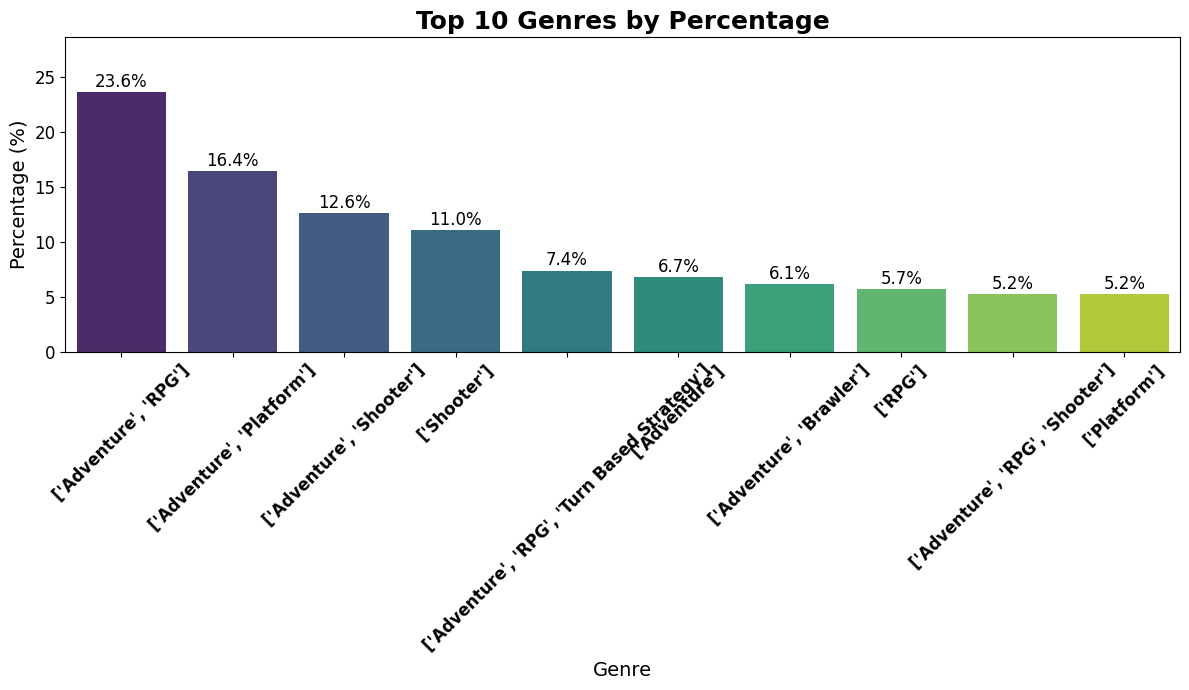

In [129]:
# plotting a distribution graph for highest counted genre, showing only top 10
# Count occurrences of each genre
# Count occurrences of each genre
genre_counts = df['Genres'].value_counts()

# Filter top 10 genres and calculate percentages
top_genres = genre_counts.head(10)  # Top 10 genres
top_genres_percentage = (top_genres / top_genres.sum()) * 100  # Convert to percentages

# Convert to DataFrame for Seaborn compatibility
top_genres_df = top_genres_percentage.reset_index()
top_genres_df.columns = ['Genres', 'Percentage']

# Create a Seaborn barplot
plt.figure(figsize=(12, 7))
sns.barplot(data=top_genres_df, x='Genres', y='Percentage', palette='viridis')

# Add titles and labels
plt.title('Top 10 Genres by Percentage', fontsize=18, weight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(fontsize=12, rotation=45, weight='bold')
plt.yticks(fontsize=12)
plt.ylim(0, top_genres_percentage.max() + 5)  # Adjust y-axis for better visibility

# Annotate the bars with percentages
for index, row in top_genres_df.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [130]:
# Radar Chart from: Gaming Evolution: Exploring vediogames Code

In [131]:
fig=px.scatter(df, x='Plays', y='Playing', color='Title',size='Plays',hover_data=['Rating','Genres'])
fig.show()

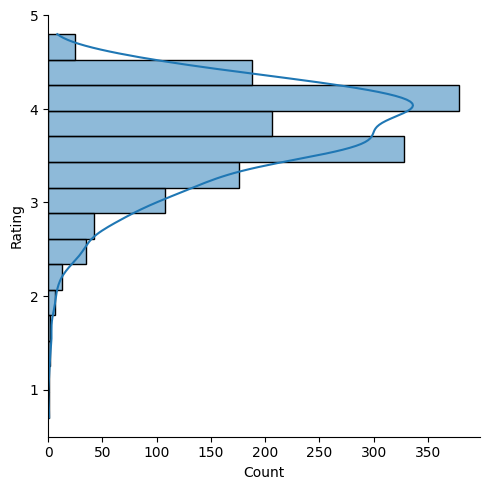

In [132]:
# Exploration of the rating columns in Gaming evolution
import seaborn as sns
sns.displot(data=df,y= 'Rating', kde=True, bins=15)

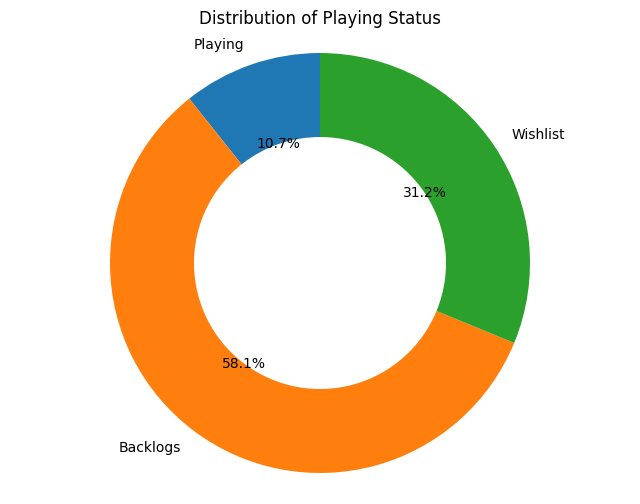

In [133]:
# Something fishy is in the below codes plot is not same as before check it!
# Plot donut chart for playing status
playing_counts = df[['Playing', 'Backlogs', 'Wishlist']].sum()
plt.figure(figsize=(8, 6))
plt.pie(playing_counts, labels=playing_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Distribution of Playing Status')
plt.axis('equal')
plt.show()

In [134]:
df['Summary'].value_counts().head(3)

,count
Summary,
"Minecraft focuses on allowing the player to explore, interact with, and modify a dynamically-generated map made of one-cubic-meter-sized blocks. In addition to blocks, the environment features plants, mobs, and items. Some activities in the game include mining for ore, fighting hostile mobs, and crafting new blocks and tools by gathering various resources found in the game. The game's open-ended model allows players to create structures, creations, and artwork on various multiplayer servers or their single-player maps. Other features include redstone circuits for logic computations and remote actions, minecarts and tracks, and a mysterious underworld called the Nether. A designated but completely optional goal of the game is to travel to a dimension called the End, and defeat the ender dragon.",5
"Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between.",3
"'Dark Souls II: Scholar of the First Sin' is an upgrade and bundle of Dark Souls II that brings the game to Playstation 4 and Xbox One, as well as DX11 features on PC. It also bundles all previous DLCs and provides additional features and content.",3


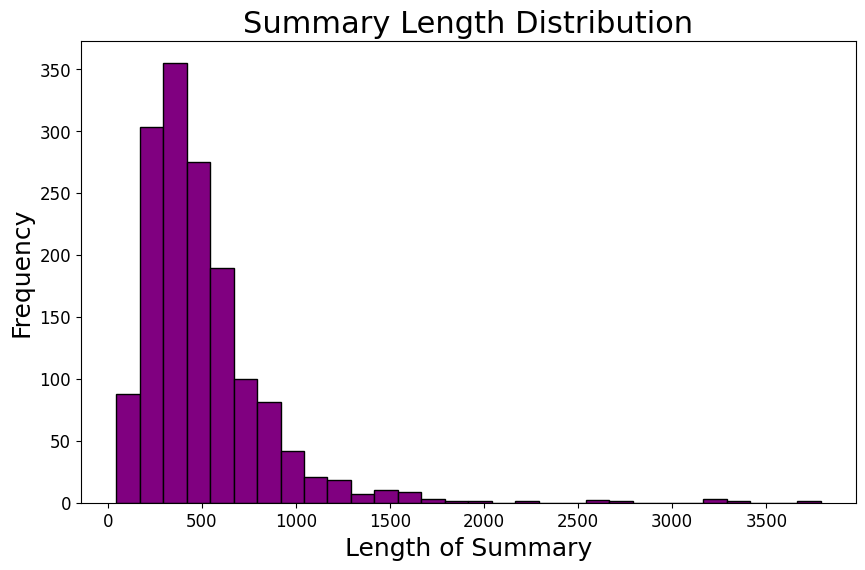

In [135]:
# Try to change the code

# Calculate summary lengths
df['Summary Length'] = df['Summary'].str.len()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Summary Length'], bins=30, color='purple', edgecolor='black')
plt.title('Summary Length Distribution', fontsize=22)
plt.xlabel('Length of Summary',fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The game with the highest number of ratings is: Doom


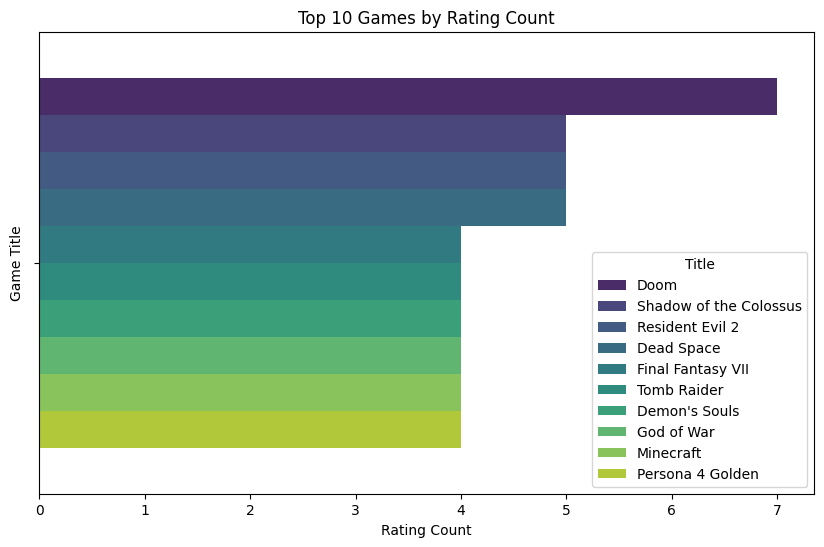

In [136]:
# Change the code
# Calculate rating counts
rating_counts = df.groupby('Title')['Rating'].count().reset_index()

# Sort in descending order
sorted_ratings = rating_counts.sort_values('Rating', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', hue='Title', data=sorted_ratings.head(10), palette='viridis', legend=True)
plt.title('Top 10 Games by Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Game Title')



# Retrieve the game with the highest rating count
highest_rated_game = sorted_ratings.iloc[0]['Title']

# Print the result
print(f"The game with the highest number of ratings is: {highest_rated_game}")

<Axes: >

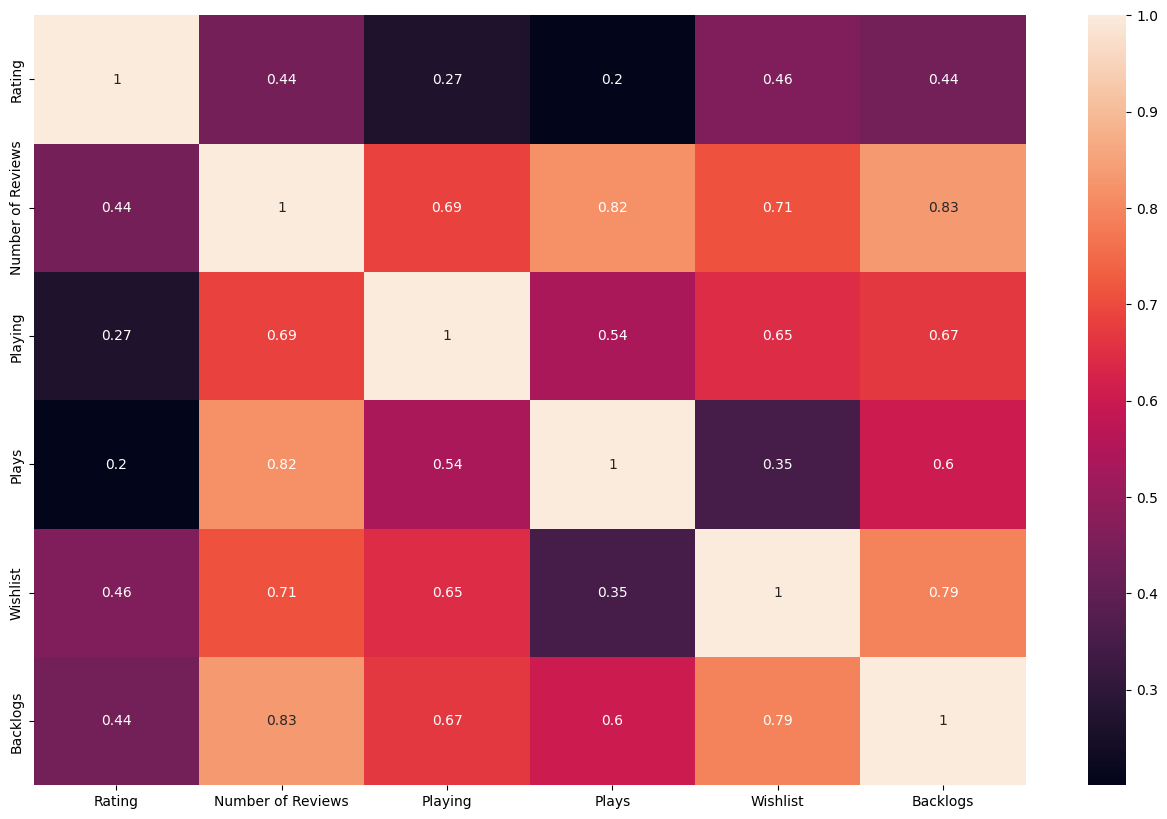

In [137]:
# Try to change the code

# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10))
# make a list of numeric columns
numeric_cols = ['Rating', 'Number of Reviews', 'Playing', 'Plays', 'Wishlist', 'Backlogs']
sns.heatmap(df[numeric_cols].corr(), annot=True)

Hence By plotting the Heatmap I come to know that Number of Reviews have higher correlation with Wishlist

# Recommendation system

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from imageio import imread
import ast

In [139]:

# Convert string representations of lists into actual Python lists
df['Genres'] = df['Genres'].apply(ast.literal_eval)
df['Reviews'] = df['Reviews'].apply(ast.literal_eval)
df['Team'] = df['Team'].apply(ast.literal_eval)

# Display the updated DataFrame
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Summary Length
0,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",[The first playthrough of elden ring is one of...,17000,3800,4600,4800,231
1,Hades,2019-12-10,[Supergiant Games],4.3,2900,2900,"[Adventure, Brawler, Indie, RPG]",A rogue-lite hack and slash dungeon crawler in...,[convinced this is a roguelike for people who ...,21000,3200,6300,3600,319
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,4300,4300,"[Adventure, RPG]",The Legend of Zelda: Breath of the Wild is the...,[This game is the game (that is not CS:GO) tha...,30000,2500,5000,2600,600
3,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,3500,3500,"[Adventure, Indie, RPG, Turn Based Strategy]","A small child falls into the Underground, wher...",[soundtrack is tied for #1 with nier automata....,28000,679,4900,1800,386
4,Hollow Knight,2017-02-24,[Team Cherry],4.4,3000,3000,"[Adventure, Indie, Platform]",A 2D metroidvania with an emphasis on close co...,"[this games worldbuilding is incredible, with ...",21000,2400,8300,2300,390


In [140]:
df.head().map(type)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Summary Length
0,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'list'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
1,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'list'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
2,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'list'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
3,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'list'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>
4,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'list'>,<class 'float'>,<class 'int'>,<class 'int'>,<class 'list'>,<class 'str'>,<class 'list'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>,<class 'int'>


In [141]:
'''
# Content Based Filtering, using columns: Title, Rating, Number of Reviews, Genres, Summary, Reviews, more.
# We don't need: Times listed

Different models that we can build:
1) Tensorflow Recommendation system
2) Plot/Description based recommendation system
3) Review based recommendation system
4) Content Filtering based using different Parameters
5) Recbole model
6) TF-IDF based model

* Transfer learning
* Generative AI

# Difference between Countvectorizer and TF-IDF
'''

"\n# Content Based Filtering, using columns: Title, Rating, Number of Reviews, Genres, Summary, Reviews, more.\n# We don't need: Times listed\n\nDifferent models that we can build:\n1) Tensorflow Recommendation system\n2) Plot/Description based recommendation system\n3) Review based recommendation system\n4) Content Filtering based using different Parameters\n5) Recbole model\n6) TF-IDF based model\n\n* Transfer learning\n* Generative AI\n\n# Difference between Countvectorizer and TF-IDF\n"

## Plot based Recommendation System

In [142]:
# Plot/Summary based recommendation system
tfidf = TfidfVectorizer(stop_words='english')
df['Summary'] = df['Summary'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['Summary'])
tfidf_matrix.shape

(1512, 9891)

In [144]:
'''Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster. '''

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['Title'])

In [147]:
def get_recommendations(Title, cosine_sim=cosine_sim):
    idx = indices[Title]

    # Get the pairwsie similarity scores of all games with that games
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    # Convert similarity score to a single value if it's an array
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0] if isinstance(x[1], np.ndarray) else x[1], reverse=True)

    # Get the games of the 10 most similar games
    sim_scores = sim_scores[1:11]

    # Get the games indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar games
    return df['Title'].iloc[movie_indices]

In [191]:
import numpy as np

def get_recommendations2(Title, cosine_sim=cosine_sim, top_n=10):

    idx = indices[Title]

    # Get the pairwsie similarity scores of all games with that games
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    # Convert similarity score to a single value if it's an array
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0] if isinstance(x[1], np.ndarray) else x[1], reverse=True)

    # Get the games of the top_n most similar games
    sim_scores = sim_scores[1:top_n+1]  # +1 to include top_n

    # Get the games indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top top_n most similar games
    return df['Title'].iloc[movie_indices]

def diversified_recommendations(Title, cosine_sim=cosine_sim, top_n=10, diversity=0.5):
    """
    Provides diversified game recommendations using a simple diversity factor.

    Args:
        Title (str): The title of the game to get recommendations for.
        cosine_sim (np.ndarray): The cosine similarity matrix.
        top_n (int): The number of recommendations to return.
        diversity (float): A value between 0 and 1, controlling the diversity.
                           Higher values lead to more diverse recommendations.

    Returns:
        pd.Series: A series containing the titles of the diversified recommended games.
    """

    initial_recommendations = get_recommendations2(Title, cosine_sim, top_n=int(top_n * (1 + diversity)))

    selected_recommendations = [initial_recommendations.iloc[0]]
    remaining_recommendations = initial_recommendations.iloc[1:]

    for _ in range(top_n - 1):
        best_score = -1
        best_recommendation = None

        for recommendation in remaining_recommendations.index:
            # Check if cosine_sim result is an array and access the first element if necessary
            score = cosine_sim[indices[selected_recommendations[-1]], indices[recommendation]][0] if isinstance(cosine_sim[indices[selected_recommendations[-1]], indices[recommendation]], np.ndarray) else cosine_sim[indices[selected_recommendations[-1]], indices[recommendation]]
            diversity_score = 1 - score  # Higher diversity_score means more diverse

            total_score = diversity * diversity_score + (1 - diversity) * score

            if total_score > best_score:
                best_score = total_score
                best_recommendation = recommendation  # Store the index instead of the title

        # Check if best_recommendation is found before appending and dropping
        if best_recommendation is not None:
            selected_recommendations.append(best_recommendation)
            try:
                remaining_recommendations = remaining_recommendations.drop(labels=[best_recommendation], errors='ignore')
            except KeyError:
                # If best_recommendation is not found in remaining_recommendations, break the loop
                break
        else:
            # Handle case where no suitable recommendation is found
            break  # For example, break the loop if no diverse recommendation is found

    # Create a DataFrame for the recommendations
    recommendations_df = df[df['Title'].isin(selected_recommendations)][['Title', 'Summary', 'Genres']].copy()
    recommendations_df.reset_index(drop=True, inplace=True)

    return recommendations_df

In [192]:
get_recommendations('God of War')


,Title
0,Elden Ring
2,The Legend of Zelda: Breath of the Wild
3,Undertale


In [193]:
get_recommendations2('God of War')

,Title
0,Elden Ring
2,The Legend of Zelda: Breath of the Wild
3,Undertale


In [195]:
recommendations = diversified_recommendations('God of War')
recommendations

<ipython-input-191-0a50b7e29da1>:49: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-191-0a50b7e29da1>:49: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,Title,Summary,Genres
0,Elden Ring,"Elden Ring is a fantasy, action and open world...","[Adventure, RPG]"
1,Elden Ring,"Elden Ring is a fantasy, action and open world...","[Adventure, RPG]"
2,Elden Ring,"Elden Ring is a fantasy, action and open world...","[Adventure, RPG]"


In [155]:
get_recommendations('The LEGO Movie Videogame')

,Title
673,LEGO Batman 2: DC Super Heroes
1458,Superman: The New Superman Adventures
1013,LEGO Batman: The Video Game
590,Injustice: Gods Among Us
100,MultiVersus
103,Marvel's Guardians of the Galaxy
1003,Batman: Arkham Origins
1217,Ninja Gaiden Black
137,Batman: Arkham Knight
426,Batman: Arkham Knight


In [156]:
get_recommendations('Roblox')

,Title
771,World of Warcraft
962,Kingdom Hearts II
299,Super Smash Bros. for Nintendo 3DS
1037,Super Smash Bros. for Nintendo 3DS
45,Doom
371,Doom
821,Doom
215,Garry's Mod
482,Garry's Mod
228,Resident Evil 6


In [157]:
get_recommendations('Minecraft')

,Title
1,Hades
2,The Legend of Zelda: Breath of the Wild
3,Undertale


In [159]:
get_recommendations('Red Dead Redemption 2')

,Title
1,Hades
2,The Legend of Zelda: Breath of the Wild


## Multiple metrics recommendation